# 공간분석과 공간통계: 네트워크분석(공간적상호작용 모델)
#### 가천대학교 공간정보시스템(14842001) 장요한 (ycanns@gachon.ac.kr)

---

#### 1. Initialization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\johny\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\johny\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\johny\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\johny\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


#### 2. Set Supply and Demand locations

In [2]:
# Define store locations and their attractiveness
stores = pd.DataFrame({'Store':['A', 'B', 'C'], 'Attractiveness':[0.2, 0.3, 0.5], 'X':[1, 2, 4], 'Y':[1, 3, 2]})

# Define customer locations
customers = pd.DataFrame({'X':[3, 2], 'Y':[2, 4]})

#### 3. Calculate Distances

In [3]:
# Calculate distance from each customer to each store
for store in stores['Store']:
    store_x = stores['X']-customers['X']
    store_y = stores['Y']-customers['Y']
    stores[store+'_Dist'] = ((store_x.values.reshape(-1,1))**2 + (store_y.values.reshape(-1,1))**2)**0.5

# Calculate probability of each customer choosing each store
for store in stores['Store']:
    stores[store+'_Prob'] = stores['Attractiveness']*stores[store+'_Dist'].apply(lambda x: 1/x)
    stores[store+'_Prob'] = stores[store+'_Prob']/stores.filter(regex='_Prob').sum(axis=1)

In [4]:
stores

,Store,Attractiveness,X,Y,A_Dist,B_Dist,C_Dist,A_Prob,B_Prob,C_Prob
0,A,0.2,1,1,2.236068,2.236068,2.236068,1.0,0.082100,0.076346
1,B,0.3,2,3,1.000000,1.000000,1.000000,1.0,0.230769,0.195980
2,C,0.5,4,2,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Print the probability table
print(stores.filter(regex='_Prob'))

   A_Prob    B_Prob    C_Prob
0     1.0  0.082100  0.076346
1     1.0  0.230769  0.195980
2     NaN       NaN       NaN


#### 4. Visualization

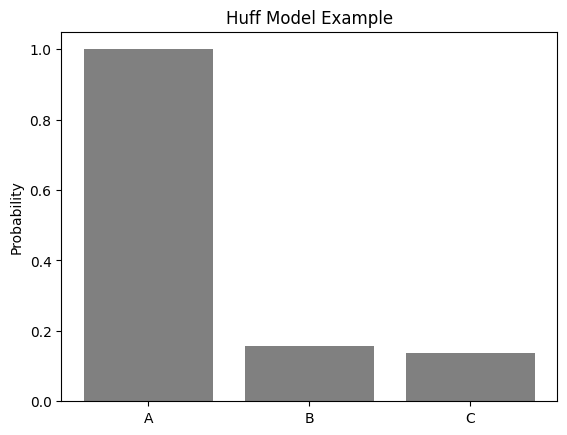

In [6]:
# Plot the probability for each store
fig, ax = plt.subplots()
ax.bar(stores['Store'], stores.filter(regex='_Prob').mean(), color='gray')
ax.set_ylabel('Probability')
ax.set_title('Huff Model Example')
plt.show()

In [7]:
customers

,X,Y
0,3,2
1,2,4


#### END CODE